## Assignment 3 Data Analysis using Pandas

This assignment will contain 1 question with details as below. The due date is October 16 (Friday), 2020 23:59PM. Each late day will result in 20% loss of total points.

### Question 1 (100 points) Celluloid ceiling

Wonder Woman             |  Captain Marvel
:-------------------------:|:-------------------------:
![wonderwoman](https://upload.wikimedia.org/wikipedia/en/e/ed/Wonder_Woman_%282017_film%29.jpg) | ![marvel](https://upload.wikimedia.org/wikipedia/pt/5/59/Captain_Marvel_%282018%29.jpg)

Women are involved in the film industry in all roles, including as film directors, actresses, cinematographers, film producers, film critics, and other film industry professions, though women have been underrepresented in all these positions. Studies found that women have always had a presence in film acting, but have consistently been underrepresented, and on average significantly less well paid. 

In 2015, Forbes reported that "...just 21 of the 100 top-grossing films of 2014 featured a female lead or co-lead, while only 28.1% of characters in 100 top-grossing films were female... This means it’s much rarer for women to get the sort of blockbuster role which would warrant the massive backend deals many male counterparts demand (Tom Cruise in Mission: Impossible or Robert Downey Jr. in Iron Man, for example)".

Also, Forbes' analysis of US acting salaries in 2013 determined that the "...men on Forbes’ list of top-paid actors for that year made 2½ times as much money as the top-paid actresses. That means that Hollywood's best-compensated actresses made just 40 cents for every dollar that the best-compensated men made. 


In this assignment, we want to examine whether and how women representation is lacking in the film industry. We will adopt The Bechdel test as a measure of the representation of women in the film industry. The test is named after the American cartoonist Alison Bechdel in whose 1985 comic strip Dykes to Watch Out For the test first appeared. **A movie is said to meet the Bechdel test  following three criteria: (1) it has to have at least two women in it, who (2) who talk to each other, about (3) something besides a man.**

We are going to obtain the data ourselves to perform the analysis. Specifically, we will retrieve the movie metadata from IMDB (Internet Movie Database), an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. As of January 2020, IMDb has approximately 6.5 million titles (including episodes) and 10.4 million personalities in its database, as well as 83 million registered users.


The IMDb Top 250 is a list of the top rated 250 films, based on ratings by the registered users of the website using the methods described. We will focus on these famous movies in this analysis:

**Question 1.1** (20 points): We will retrieve the metadata of IMDb Top 250 movies from the [IMDb charts](https://www.imdb.com/chart/top/). For each movie on the list, we can scrape the following characteristics from the information page. For example, from the [page of top rated movie "The Shawshank Redemption"](https://www.imdb.com/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=F4QFC0SVZN1HTDHCY3C0&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1), we want to extract the metadata about this movie as:
- IMDb id (0111161)
- Movie name (The Shawshank Redemption) - DONE
- Year (1994)- DONE
- Director (Frank Darabont)-DONE
- Starring (Tim Robbins, Morgan Freeman, Bob Gunton)- DONE
- Rating (9.3) - DONE
- Number of reviews (2,291,324) - DONE
- Genres (Drama) - DONE
- Country (USA) - DONE
- Language (English) - DONE
- Budget (\$25,000,000) - DONE
- Box Office Revenue (\$28,815,291) - DONE
- Runtime (142 min) - DONE

![imdb](https://mrfloris.com/files/images/imdb-top250-page-start.png)


After scraping the 250 movies, save the data as a dataframe ```imdb_top_movies```. 
Also, saving the dataframe to a local file ```imdb_top_movies.csv``` so that later you can load it without scraping the website twice.

Hint: You can get the links to these movies from the IMDb top chart page, and then scrape each movie page by sending the request to these links. At each movie page, the information requested are located at different sections. 

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
from decimal import Decimal
from re import sub
import matplotlib.pyplot as plt

In [1]:
# Question 1.1
url = "https://www.imdb.com/chart/top/"

headers = {'Accept-Language': 'en-US, en;q=0.5'}
response = requests.get(url,headers = headers)

print(response)

soup = BeautifulSoup(response.text)
llist = soup.find('tbody', {'class':'lister-list'})
trs = llist.findAll('tr')

movie = {}
films = []
categories = ['id', 'title', 'year', 'director', 'starring', 'rating', 'num_reviews', 'genres', 'country', 'language', 'budget', 'box_office', 'run_time' ]

df = pd.DataFrame(columns=categories)
for tr in trs:
    row_info= tr.find('td',{'class':'titleColumn'})
    link = row_info.find('a')['href']
    movie_url = 'https://www.imdb.com' + link
    res = requests.get(movie_url, headers = headers)
    soup = BeautifulSoup(res.text)
    llist = soup.find('div', {'class':'title_wrapper'})
    
    film_title = soup.find('div', {'class':'title_wrapper'}).find('h1').contents[0].replace(u'\xa0', u'')
    
    movie_id = link.split('/')[2]
    movie_id = re.findall(r'\d+', movie_id)
    movie_id = int(''.join(movie_id))
    
    rating = soup.find('div', {'class':'ratingValue'}).findAll('span')[0].text
    rating=float(rating)
    
    reviews = soup.findAll('div', {'class':'titleReviewbarItemBorder'})[0].find('a').contents[0].split()[0]
    
    
    genres = soup.find('div', {'class':'subtext'}).findAll('a', text=True)
    movie_genres = []
    for each in genres[:-1]: 
        movie_genres.append(str(each.get_text()))
    
    language = soup.find('div', {'id':'titleDetails'}).findAll('div', {'class':'txt-block'})[2].findAll('a', text=True)
    movie_languages = []
    for each in language: 
        movie_languages.append(str(each.get_text()))
        
        
    country = soup.find('div', {'id':'titleDetails'}).findAll('div', {'class':'txt-block'})[1].findAll('a', text=True)
    movie_countries = []
    for each in country: 
        movie_countries.append(str(each.get_text()))
        
        
    b=[]                    #---------------------------Remove unwanted entries
    d={'Country':'', 'Language':''}
    for a in soup.find_all("div",{"class":"txt-block"}):
        c=a.get_text(strip=True).split(':')
        if c[0] in d:
            b.append(c)

    for i in b:             #---------------------------Update default values if entries are found
            if i[0] in d: 
                d.update({i[0]:i[1]})                
        #print(d)

    country=d['Country'].split('|')
    language=d['Language'].split('|')
    
        
        
    b=[]                    #---------------------------Remove unwanted entries
    d={'Budget':'', 'Opening Weekend USA':'','Gross USA':'','Cumulative Worldwide Gross':'','Production Co':''}
    for a in soup.find_all("div",{"class":"txt-block"}):
        c=a.get_text(strip=True).split(':')
        if c[0] in d:
            b.append(c)

    for i in b:             #---------------------------Update default values if entries are found
            if i[0] in d: 
                d.update({i[0]:i[1]})                
        #print(d)

    production_company=d['Production Co'].split('See more')[0]
    cum_world_gross=d['Cumulative Worldwide Gross'].split(' ')[0]
    budget=d['Budget']
    budget=d['Budget'].split('(')[0]
    if '$' in budget:
        budget = budget.split('$')[1]
        budget = Decimal(sub(r'[^\d.]', '', budget))
        budget = int(budget)
    else:
        budget = None;
    if '$' in cum_world_gross:
        cum_world_gross = cum_world_gross.split('$')[1]
        cum_world_gross = Decimal(sub(r'[^\d.]', '', cum_world_gross))
        cum_world_gross = float(cum_world_gross)
    else:
        cum_world_gross = None;
    
    
    run_time = soup.find('div', {'id':'titleDetails'}).find('time').text.split(' ')[0]
    run_time= int(run_time)
   

    film_title = soup.find('div', {'class':'title_wrapper'}).find('h1').contents[0].replace(u'\xa0', u'')
    
    movie_year = soup.find('h1').find('a').text
    director = soup.find('div', {'class':'credit_summary_item'}).find('a').text
    
    
    starring = soup.findAll('div', {'class':'credit_summary_item'})[2].findAll('a')#.findAll(text=True, recursive=False)
    
    stars = []
    for each in starring[:-1]: 
        stars.append(str(each.get_text()))
    
    #print(type(stars))
      
    
    df = df.append({'id': movie_id, 'title': film_title,'year': movie_year, 'director': director,
                    'rating': rating, 'num_reviews': reviews, 
                    'starring': stars, 'genres': movie_genres, 'language': language,
                   'country': country, 'budget': budget, 'box_office': cum_world_gross,
                   'run_time': run_time}, ignore_index=True)

df.to_csv (r'imdb_db.csv', index = False, header=True)    
df

NameError: name 'requests' is not defined

**Question 1.2** (5 points) If you group the movies by release years, show the number of movies at each decade in a descendingu order.

In [2]:
from ast import literal_eval
df = pd.read_csv('imdb_db.csv', encoding='utf-8')
df['starring'] = df['starring'].apply(literal_eval)
df['genres'] = df['genres'].apply(literal_eval)
df['language'] = df['language'].apply(literal_eval)

df['year'] = pd.to_datetime(df['year'], format='%Y')
df.index = pd.to_datetime(df['year'], format='%Y')

sample_df = df.groupby(pd.cut(df.year, pd.date_range('1920', '2020', freq='10YS'), right=False)).count().sort_values('id', ascending=False)['id']
sample_df

year
[2010-01-01, 2020-01-01)    50
[2000-01-01, 2010-01-01)    48
[1990-01-01, 2000-01-01)    40
[1980-01-01, 1990-01-01)    29
[1950-01-01, 1960-01-01)    23
[1960-01-01, 1970-01-01)    18
[1970-01-01, 1980-01-01)    18
[1940-01-01, 1950-01-01)    10
[1920-01-01, 1930-01-01)     7
[1930-01-01, 1940-01-01)     6
Name: id, dtype: int64

**Quesion 1.3** (5 points) Show the number of movies by the distribution of runtime at quartile (0-25%, 25-50%, 50-75%, 75-100%).

In [3]:
# Question 1.3

first_quartile = df['run_time'].quantile(.25)
first_quartile_count = len(df[df['run_time'] < first_quartile])+1

second_quartile = df['run_time'].quantile(.5)
second_quartile_count = len(df[df['run_time'] < second_quartile])+1 - first_quartile_count

third_quartile = df['run_time'].quantile(.75)
third_quartile_count = len(df[df['run_time'] < third_quartile])+1 - second_quartile_count - first_quartile_count

last_quartile = df['run_time'].quantile(1)
last_quartile_count = len(df[df['run_time'] < last_quartile])+1 - third_quartile_count - second_quartile_count - first_quartile_count

print('first_quartile:',first_quartile_count, '\nsecond_quartile:',second_quartile_count,'\nthird_quartile:',third_quartile_count,'\nlast_quartile:',last_quartile_count)

first_quartile: 64 
second_quartile: 62 
third_quartile: 62 
last_quartile: 62


**Question 1.4** (5 points) What is the proportion of movies that have Budget higher than 75% of all movies (i.e. the third quartile)?

In [4]:
# Quesion 1.4
from decimal import Decimal
from re import sub

third_quartile = df['budget'].quantile(.750)
third_quartile_count = len(df[df['budget'] > third_quartile])+1
proportion=third_quartile_count/250
print(f'{proportion*100}%')

20.0%


**Question 1.5** (5 points) Show the top 10 most popular actor/actresses in terms of number of movies they have starred. 

In [5]:
# Question 1.5
actors_list = []
for actors in df['starring']:
    for actor in actors:
        actors_list.append(actor)
        
actors_counter = dict()
for actor in actors_list:
    actors_counter[actor] = actors_counter.get(actor, 0) + 1

actors_counter
sorted_actors_counter = sorted(actors_counter.items(), key=lambda x: x[1])
sorted_actors_counter[-10:]

for elements in sorted_actors_counter[-10:]:
    print(elements)

('Tatsuya Nakadai', 4)
('Mark Ruffalo', 4)
('Aamir Khan', 4)
('Christian Bale', 5)
('Clint Eastwood', 5)
('Tom Hanks', 6)
('Leonardo DiCaprio', 6)
('Harrison Ford', 6)
('Charles Chaplin', 6)
('Robert De Niro', 9)


**Question 1.6** (5 points) Show the top 5 directors with the most total box office revenues.

In [6]:
# Question 1.6

df.groupby('director')[['box_office']].sum().sort_values('box_office', ascending=False).head(5)

,box_office
director,
Anthony Russo,4.846160e+09
Christopher Nolan,4.143001e+09
Steven Spielberg,3.055116e+09
Peter Jackson,2.973488e+09
Pete Docter,2.172152e+09


**Question 1.7** (5 points) Show the average ratings of movies across the genres and decades.

In [39]:
genres_list = []
for genres in df['genres']:
    for genre in genres:
        genres_list.append(genre)

genres_list = list(set(genres_list))
print(genres_list)


movies=[]
dictionary = {'genre':"","decade":0, "rating_mean": 0}
final_df = pd.DataFrame(columns=['decade','genre', 'rating_mean'])
genres_list


years=[]
for key, value in decade_df:
    years.append(key)


for year in years:
    for key, value in decade_df:
        if key == year:
            for genres in value['genres']:
                for genre in genres_list:
                    if genre in genres:
                        dictionary['genre']=genre
                        dictionary['decade']= key
                        dictionary['rating_mean']= value['rating'].mean()
                        dictionary_copy = dictionary.copy()
                        movies.append(dictionary_copy)

res = list(map(dict, set(tuple(sorted(sub.items())) for sub in movies)))            
            
for info in res:
    final_df = final_df.append({'decade': info['decade'], 'rating_mean': info['rating_mean'], 'genre': info['genre']}, ignore_index=True)
    

final_df

['Western', 'Romance', 'Sci-Fi', 'Adventure', 'Sport', 'History', 'Fantasy', 'Family', 'Music', 'Musical', 'Action', 'Drama', 'War', 'Thriller', 'Comedy', 'Animation', 'Horror', 'Biography', 'Mystery', 'Film-Noir', 'Crime']


,decade,genre,rating_mean
0,1950,Comedy,8.278261
1,1990,Adventure,8.397500
2,1930,Drama,8.266667
3,2010,Western,8.252000
4,2010,History,8.252000
...,...,...,...
138,1990,Biography,8.397500
139,1990,Western,8.397500
140,2010,Drama,8.252000
141,1950,History,8.278261


**Question 1.8** (5 points) Creat a new column ```ROI``` that measures the return on investment using the (box revenue-budget)/budget, and compare the ROI between movies in English and those in non-English. Use the t-test to examine whether such difference is statistically significant (You can use ```scipy.stats.ttest_ind``` to test the mean difference of two distributions)

In [11]:
# Question 1.8
import scipy
from scipy import stats



df['ROI'] = (df['box_office']-df['budget'])/df['budget']*100

df['language'] = [','.join(map(str, l)) for l in df_decade['language']]

    
english_films = df[df['language'].str.contains("English")]
foreign_films = df[~df['language'].str.contains("English")]


scipy.stats.ttest_ind(english_films.dropna()['ROI'], foreign_films.dropna()['ROI'])


Ttest_indResult(statistic=-0.8464209589230008, pvalue=0.39837166079035957)

**Question 1.9** (5 points) Do the commercially successfuly movies also receive higher ratings. Check the correlations between box office revenues and ratings using Pearman and Spearman correlations.

In [12]:
print('With method Pearson:', df['box_office'].corr(df['rating'], method ='pearson'))

print('With method Spearman:', df['box_office'].corr(df['rating'], method ='spearman'))

With method Pearson: 0.2066276867142253
With method Spearman: 0.1437229692597104


**Question 1.10** (10 points) Now let's retrieve data from Bechdel Test Movie website [for each movie](https://bechdeltest.com/). You can send the requests to the API: https://bechdeltest.com/api/v1/doc#getMovieByImdbId. For example, for the movie The Shawshank Redemption (the IMDb id: 0111161), you can simply call: http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0111161. 

3Create a dataframe ```bechdel_imdb_top``` that merge the bechdel test info with the ```imdb_top_movies``` show how many top 250 movies are also in the bechdel test website.

In [95]:
#Scraping API & Building and merge+ing both databases

counter = 0
bechdel_list = "http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0111161"
response = requests.get(bechdel_list)
data=response.json()
categories= list(data.keys())

bechdel_df=pd.DataFrame(columns=categories)

for film_id in df['id']:
    if len(str(film_id)) == 6:
        bechdel_list = "http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0" + str(film_id)
    elif len(str(film_id)) == 5:
        bechdel_list = "http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=00" + str(film_id)
    elif len(str(film_id)) == 7:
        bechdel_list = "http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=" + str(film_id)
    elif len(str(film_id)) == 4:
        bechdel_list = "http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid000=" + str(film_id)
    response = requests.get(bechdel_list)
    data=response.json()
    #print(data)
    bechdel_df = bechdel_df.append(data, ignore_index=True)
    

    
bechdel_df = bechdel_df.rename(columns={'rating': 'bechdel_rating'})
bechdel_df = bechdel_df.to_csv(r'bechdel_db.csv', index = False, header=True)

In [13]:
df.index.names = ['index']
df = df.reset_index()
df

,index,id,title,year,director,starring,rating,num_reviews,genres,country,language,budget,box_office,run_time,ROI
0,1994-01-01,111161,The Shawshank Redemption,1994-01-01,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton]",9.3,"8,339",[Drama],['USA'],English,25000000.0,2.881529e+07,142,15.261164
1,1972-01-01,68646,The Godfather,1972-01-01,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan]",9.2,"4,037","[Crime, Drama]",['USA'],"English,Italian,Latin",6000000.0,2.461210e+08,175,4002.016233
2,1974-01-01,71562,The Godfather: Part II,1974-01-01,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall]",9.0,"1,045","[Crime, Drama]",['USA'],"English,Italian,Spanish,Latin,Sicilian",13000000.0,4.803578e+07,202,269.506023
3,2008-01-01,468569,The Dark Knight,2008-01-01,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart]",9.0,"7,024","[Action, Crime, Drama]","['USA', 'UK']","English,Mandarin",185000000.0,1.005457e+09,152,443.490139
4,1957-01-01,50083,12 Angry Men,1957-01-01,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam]",8.9,"1,623","[Crime, Drama]",['USA'],English,350000.0,5.760000e+02,96,-99.835429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1984-01-01,88247,The Terminator,1984-01-01,James Cameron,"[Arnold Schwarzenegger, Linda Hamilton, Michae...",8.0,908,"[Action, Sci-Fi]","['UK', 'USA']","English,Spanish",6400000.0,7.868033e+07,107,1129.380172
246,2013-01-01,2991224,Tangerines,2013-01-01,Zaza Urushadze,"[Lembit Ulfsak, Elmo Nüganen, Giorgi Nakashidze]",8.2,85,"[Drama, War]","['Estonia', 'Georgia']","Estonian,Russian,Georgian",NaN,1.024132e+06,87,NaN
247,1992-01-01,103639,Aladdin,1992-01-01,Ron Clements,"[Scott Weinger, Robin Williams, Linda Larkin]",8.0,337,"[Animation, Adventure, Comedy]",['USA'],English,28000000.0,5.040502e+08,90,1700.179354
248,2016-01-01,5323662,A Silent Voice: The Movie,2016-01-01,Naoko Yamada,"[Miyu Irino, Saori Hayami, Aoi Yûki]",8.1,199,"[Animation, Drama, Family]",['Japan'],"Japanese,Japanese Sign Language",NaN,3.049045e+07,130,NaN


In [14]:
# 1.10 If this cell gives an error, run last cell.

bechdel_df = pd.read_csv('bechdel_db.csv', encoding='utf-8')


bechdel_df = bechdel_df[['visible', 'dubious', 'submitterid', 'bechdel_rating']]
bechdel_df


bechdel_imdb_top= pd.merge(df,bechdel_df,left_index=True,right_index=True)

bechdel_imdb_top_none = bechdel_imdb_top[bechdel_imdb_top['submitterid'].isnull()]
print('The number of films that are in imdb and in the bechdel site is', 250-bechdel_imdb_top_none['id'].count())

bechdel_imdb_top

The number of films that are in imdb and in the bechdel site is 235


,index,id,title,year,director,starring,rating,num_reviews,genres,country,language,budget,box_office,run_time,ROI,visible,dubious,submitterid,bechdel_rating
0,1994-01-01,111161,The Shawshank Redemption,1994-01-01,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton]",9.3,"8,339",[Drama],['USA'],English,25000000.0,2.881529e+07,142,15.261164,1.0,NaN,1.0,0.0
1,1972-01-01,68646,The Godfather,1972-01-01,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan]",9.2,"4,037","[Crime, Drama]",['USA'],"English,Italian,Latin",6000000.0,2.461210e+08,175,4002.016233,1.0,0.0,3113.0,2.0
2,1974-01-01,71562,The Godfather: Part II,1974-01-01,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall]",9.0,"1,045","[Crime, Drama]",['USA'],"English,Italian,Spanish,Latin,Sicilian",13000000.0,4.803578e+07,202,269.506023,1.0,0.0,6585.0,2.0
3,2008-01-01,468569,The Dark Knight,2008-01-01,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart]",9.0,"7,024","[Action, Crime, Drama]","['USA', 'UK']","English,Mandarin",185000000.0,1.005457e+09,152,443.490139,1.0,1.0,1.0,3.0
4,1957-01-01,50083,12 Angry Men,1957-01-01,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam]",8.9,"1,623","[Crime, Drama]",['USA'],English,350000.0,5.760000e+02,96,-99.835429,1.0,NaN,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1984-01-01,88247,The Terminator,1984-01-01,James Cameron,"[Arnold Schwarzenegger, Linda Hamilton, Michae...",8.0,908,"[Action, Sci-Fi]","['UK', 'USA']","English,Spanish",6400000.0,7.868033e+07,107,1129.380172,1.0,0.0,1587.0,3.0
246,2013-01-01,2991224,Tangerines,2013-01-01,Zaza Urushadze,"[Lembit Ulfsak, Elmo Nüganen, Giorgi Nakashidze]",8.2,85,"[Drama, War]","['Estonia', 'Georgia']","Estonian,Russian,Georgian",NaN,1.024132e+06,87,NaN,1.0,0.0,14709.0,0.0
247,1992-01-01,103639,Aladdin,1992-01-01,Ron Clements,"[Scott Weinger, Robin Williams, Linda Larkin]",8.0,337,"[Animation, Adventure, Comedy]",['USA'],English,28000000.0,5.040502e+08,90,1700.179354,1.0,NaN,1.0,0.0
248,2016-01-01,5323662,A Silent Voice: The Movie,2016-01-01,Naoko Yamada,"[Miyu Irino, Saori Hayami, Aoi Yûki]",8.1,199,"[Animation, Drama, Family]",['Japan'],"Japanese,Japanese Sign Language",NaN,3.049045e+07,130,NaN,1.0,0.0,16274.0,1.0


**Question 1.11** (5 points) Show how many movies in terms of percentage) that has passed the test in different ways (Number from 0 to 3 (0 means no two women, 1 means no talking, 2 means talking about a man, 3 means it passes the test)

In [15]:
print('The percentage of movies that have a rating in the test of 0 is:', bechdel_imdb_top[bechdel_imdb_top['bechdel_rating'] == 0]['id'].count()/bechdel_imdb_top['id'].count()*100,'%')
print('The percentage of movies that have a rating in the test of 1 is:', bechdel_imdb_top[bechdel_imdb_top['bechdel_rating'] == 1]['id'].count()/bechdel_imdb_top['id'].count()*100,'%')
print('The percentage of movies that have a rating in the test of 2 is:', bechdel_imdb_top[bechdel_imdb_top['bechdel_rating'] == 2]['id'].count()/bechdel_imdb_top['id'].count()*100,'%')
print('The percentage of movies that have a rating in the test of 3 is:', bechdel_imdb_top[bechdel_imdb_top['bechdel_rating'] == 3]['id'].count()/bechdel_imdb_top['id'].count()*100,'%')

The percentage of movies that have a rating in the test of 0 is: 19.6 %
The percentage of movies that have a rating in the test of 1 is: 32.4 %
The percentage of movies that have a rating in the test of 2 is: 9.2 %
The percentage of movies that have a rating in the test of 3 is: 32.800000000000004 %


**Question 1.12** (5 points) Show the percenage of movies given differen genres that has passed the test in different ways (Number from 0 to 3 (0 means no two women, 1 means no talking, 2 means talking about a man, 3 means it passes the test))

In [16]:
bechdel_imdb_top_zero = bechdel_imdb_top[bechdel_imdb_top['bechdel_rating'] == 0]
bechdel_imdb_top_one = bechdel_imdb_top[bechdel_imdb_top['bechdel_rating'] == 1]
bechdel_imdb_top_two = bechdel_imdb_top[bechdel_imdb_top['bechdel_rating'] == 2]
bechdel_imdb_top_three = bechdel_imdb_top[bechdel_imdb_top['bechdel_rating'] == 3]


counter_three = 0
bechdel_imdb_top_three_genres = bechdel_imdb_top_three
bechdel_imdb_top_one_genres = bechdel_imdb_top_one
bechdel_imdb_top_two_genres = bechdel_imdb_top_two
bechdel_imdb_top_zero_genres = bechdel_imdb_top_zero



counter_three = 0
dictionary = {}
print('\nNUMBER Of Movies Per genre:')
for genre in genres_list:
    for movie_genres in bechdel_imdb_top_three_genres['genres']:
        #for movie_genre in movie_genres:
        if genre in movie_genres:
            counter_three += 1
            
    for movie_genres in bechdel_imdb_top_zero_genres['genres']:
        #for movie_genre in movie_genres:
        if genre in movie_genres:
            counter_three += 1
            
    for movie_genres in bechdel_imdb_top_one_genres['genres']:
        #for movie_genre in movie_genres:
        if genre in movie_genres:
            counter_three += 1   
            
    for movie_genres in bechdel_imdb_top_two_genres['genres']:
        #for movie_genre in movie_genres:
        if genre in movie_genres:
            counter_three += 1
    
    print(genre, counter_three)
    dictionary[genre] = counter_three
    counter_three = 0
    
    
counter_three = 0
print('\nRATED ONE per genre %:')
for genre in genres_list:
    for movie_genres in bechdel_imdb_top_one_genres['genres']:
        #for movie_genre in movie_genres:
        if genre in movie_genres:
            counter_three += 1
    if (dictionary[genre] != 0):
        print(genre, "=>", (counter_three/dictionary[genre])*100)
        counter_three = 0
    
    
counter_three = 0
print('\nTWO rating per genre %:')
for genre in genres_list:
    for movie_genres in bechdel_imdb_top_two_genres['genres']:
        #for movie_genre in movie_genres:
        if genre in movie_genres:
            counter_three += 1
    if (dictionary[genre] != 0):
        print(genre, "=>", (counter_three/dictionary[genre])*100)
        counter_three = 0
    
    
counter_three = 0
print('\nZERO RATING per genre %:')
for genre in genres_list:
    for movie_genres in bechdel_imdb_top_zero_genres['genres']:
        #for movie_genre in movie_genres:
        if genre in movie_genres:
            counter_three += 1
    if (dictionary[genre] != 0):
        print(genre, "=>", (counter_three/dictionary[genre])*100)
        counter_three = 0
    
    
counter_three = 0

print('\nTHREE RATING per genre %:')
for genre in genres_list:
    for movie_genres in bechdel_imdb_top_three_genres['genres']:
        #for movie_genre in movie_genres:
        if genre in movie_genres:
            counter_three += 1
    if (dictionary[genre] != 0):
        print(genre, "=>",(counter_three/dictionary[genre])*100)
        counter_three = 0



NUMBER Of Movies Per genre:
Western 6
Romance 23
Sci-Fi 22
Adventure 56
Sport 5
History 12
Fantasy 14
Family 11
Music 3
Musical 1
Action 41
Drama 166
War 19
Thriller 38
Comedy 43
Animation 22
Horror 4
Biography 23
Mystery 27
Film-Noir 3
Crime 49

RATED ONE per genre %:
Western => 33.33333333333333
Romance => 17.391304347826086
Sci-Fi => 27.27272727272727
Adventure => 35.714285714285715
Sport => 80.0
History => 25.0
Fantasy => 28.57142857142857
Family => 27.27272727272727
Music => 66.66666666666666
Musical => 0.0
Action => 34.146341463414636
Drama => 35.54216867469879
War => 26.31578947368421
Thriller => 31.57894736842105
Comedy => 34.883720930232556
Animation => 45.45454545454545
Horror => 25.0
Biography => 43.47826086956522
Mystery => 51.85185185185185
Film-Noir => 33.33333333333333
Crime => 38.775510204081634

TWO rating per genre %:
Western => 0.0
Romance => 8.695652173913043
Sci-Fi => 9.090909090909092
Adventure => 5.357142857142857
Sport => 0.0
History => 8.333333333333332
Fantas

**Question 1.13** (5 points) Show the top 10 highest-rated movies that passed the test completely (rating=3) 

In [17]:
bechdel_imdb_top[bechdel_imdb_top['bechdel_rating'] == 3].sort_values('rating', ascending=False).head(10)

,index,id,title,year,director,starring,rating,num_reviews,genres,country,language,budget,box_office,run_time,ROI,visible,dubious,submitterid,bechdel_rating
3,2008-01-01,468569,The Dark Knight,2008-01-01,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart]",9.0,"7,024","[Action, Crime, Drama]","['USA', 'UK']","English,Mandarin",185000000.0,1.005457e+09,152,443.490139,1.0,1.0,1.0,3.0
7,1994-01-01,110912,Pulp Fiction,1994-01-01,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson]",8.9,"3,076","[Crime, Drama]",['USA'],"English,Spanish,French",8000000.0,2.141948e+08,154,2577.435588,1.0,NaN,1.0,3.0
5,1993-01-01,108052,Schindler's List,1993-01-01,Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley]",8.9,"1,867","[Biography, Drama, History]",['USA'],"English,Hebrew,German,Polish,Latin",22000000.0,3.222878e+08,195,1364.944518,1.0,0.0,1761.0,3.0
12,2010-01-01,1375666,Inception,2010-01-01,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elle...",8.8,"3,990","[Action, Adventure, Sci-Fi]","['USA', 'UK']","English,Japanese,French",160000000.0,8.368370e+08,148,423.023104,1.0,1.0,1228.0,3.0
13,2002-01-01,167261,The Lord of the Rings: The Two Towers,2002-01-01,Peter Jackson,"[Elijah Wood, Ian McKellen, Viggo Mortensen]",8.7,"2,580","[Action, Adventure, Drama]","['New Zealand', 'USA']","English,Sindarin,Old English",94000000.0,9.432823e+08,179,903.491777,1.0,NaN,6.0,3.0
15,1999-01-01,133093,The Matrix,1999-01-01,Lana Wachowski,"[Keanu Reeves, Laurence Fishburne, Carrie-Anne...",8.7,"4,338","[Action, Sci-Fi]",['USA'],English,63000000.0,4.657165e+08,136,639.232563,1.0,0.0,1.0,3.0
16,1990-01-01,99685,Goodfellas,1990-01-01,Martin Scorsese,"[Robert De Niro, Ray Liotta, Joe Pesci]",8.7,"1,336","[Biography, Crime, Drama]",['USA'],"English,Italian",25000000.0,4.688466e+07,146,87.538660,1.0,1.0,3100.0,3.0
26,2001-01-01,245429,Spirited Away,2001-01-01,Hayao Miyazaki,"[Daveigh Chase, Suzanne Pleshette, Miyu Irino]",8.6,"1,336","[Animation, Adventure, Family]",['Japan'],Japanese,19000000.0,3.554671e+08,125,1770.879347,1.0,0.0,743.0,3.0
29,2014-01-01,816692,Interstellar,2014-01-01,Christopher Nolan,"[Matthew McConaughey, Anne Hathaway, Jessica C...",8.6,"4,164","[Adventure, Drama, Sci-Fi]","['USA', 'UK', 'Canada']",English,165000000.0,6.962582e+08,169,321.974648,1.0,0.0,11170.0,3.0
28,2019-01-01,6751668,Parasite,2019-01-01,Bong Joon Ho,"[Kang-ho Song, Sun-kyun Lee, Yeo-jeong Jo]",8.6,"2,786","[Comedy, Drama, Thriller]",['South Korea'],"Korean,English",11400000.0,2.575652e+08,132,2159.344246,1.0,1.0,17199.0,3.0


**Question 1.14** (5 points) Compareing the movies that passed (rating=3) and failed the test (rating=0), are their ROI different? Explain.

In [18]:

bechdel_imdb_top_zero = bechdel_imdb_top[bechdel_imdb_top['bechdel_rating'] == 0]
print(bechdel_imdb_top_zero['ROI'].mean())


bechdel_imdb_top_three = bechdel_imdb_top[bechdel_imdb_top['bechdel_rating'] == 3]
print(bechdel_imdb_top_three['ROI'].mean())

print('On average, the ROI is diferent by 300. This simple analysis concludes that the movies that have a rating of 3 have, in fact, a greater return on investment.')

622.4476357632003
914.1922290084611
On average, the ROI is diferent by 300. This simple analysis concludes that the movies that have a rating of 3 have, in fact, a greater return on investment.


**Question 1.15** (10 points) Now load the ```bechdel_imdb.json``` that contains the all movies that are rated by the Bechdel Test website. Are women representation improved over the decades? Create a dataframe ```bechdel_imdb```, comparing the top 250 and other movies, in terms of percentage, how many passed/failed the test? 

year
1880    0.000000
1890    0.250000
1900    0.095238
1910    1.576923
1920    1.195122
1930    2.069307
1940    1.982063
1950    1.970370
1960    1.811209
1970    1.962865
1980    2.072607
1990    2.166827
2000    2.213860
2010    2.278662
2020    2.578947
Name: rating, dtype: float64
As we can see, on average, women representation got better over the decades.
                          bechdel_rating
year                                    
[1920-01-01, 1930-01-01)        0.142857
[1930-01-01, 1940-01-01)        2.333333
[1940-01-01, 1950-01-01)        1.600000
[1950-01-01, 1960-01-01)        1.260870
[1960-01-01, 1970-01-01)        1.000000
[1970-01-01, 1980-01-01)        1.588235
[1980-01-01, 1990-01-01)        1.285714
[1990-01-01, 2000-01-01)        1.605263
[2000-01-01, 2010-01-01)        1.681818
[2010-01-01, 2020-01-01)        2.127660

As we can see, on average, women representation is better on the full list when compared to the TOP 250 by decade.


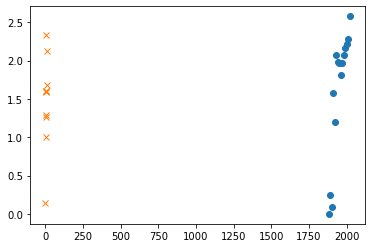


In the graph, we can clearly see that for the most part of the decades, 
the average rating of the bechdel test of the full movie list is better than on the top 250


In [51]:
bechdel_imdb_json = pd.read_json("bechdel_imdb.json")


rating_0 = bechdel_imdb_json[bechdel_imdb_json['rating']==0]
rating_3 = bechdel_imdb_json[bechdel_imdb_json['rating']==3]

print(bechdel_imdb_json.groupby((bechdel_imdb_json.year//10)*10)['rating'].mean())

print('As we can see, on average, women representation got better over the decades.')

print(bechdel_imdb_top.groupby(pd.cut(df.year, pd.date_range('1920', '2020', freq='10YS'), right=False))[['bechdel_rating']].mean())
#print(bechdel_imdb_top.groupby((bechdel_imdb_top.year//10)*10)['bechdel_rating'].mean())

print('\nAs we can see, on average, women representation is better on the full list when compared to the TOP 250 by decade.')

# Comparing graphically the mean of the TOP 250 with all the movies in the Bechdel JSON overtime:
bechdel_imdb_json.groupby((bechdel_imdb_json.year//10)*10)['rating'].mean().plot(style=['o'], label="sine")
bechdel_imdb_top.groupby(pd.cut(df.year, pd.date_range('1920', '2020', freq='10YS'), right=False))[['bechdel_rating']].mean().plot(style=['x'], label="TOP 250")
|plt.gca().legend(('FULL LIST','TOP 250'))
plt.show()

#bechdel_json_passed = bechdel_imdb_json.groupby((bechdel_imdb_json.year//10)*10)#['rating'==3].count()
#bechdel_json_passed = bechdel_imdb_json.groupby((bechdel_imdb_json.year//10)*10)['rating'].count()


#bechdel_passed=rating_3.groupby((rating_3.year//10)*10)['id'].count()
#bechdel_not_passed=rating_0.groupby((rating_0.year//10)*10)['id'].count()

#print('\nPercentage of films that DID NOT pass completely the bechdel test in the full list of movies:\n', bechdel_not_passed/bechdel_imdb_json['id'].count()*100)
#print('\nPercentage of films that passed the bechdel test in the full list of movies:\n', bechdel_passed/bechdel_imdb_json['id'].count()*100)

print('\nIn the graph, we can clearly see that for the most part of the decades, \nthe average rating of the bechdel test of the full movie list is better than on the top 250')